**Reference**: Dive into Deep Learning -- ASTON ZHANG

https://drive.google.com/file/d/1bV_z9nx2dF2oSqM5ly82izKmWwgi9ylj/view?usp=drive_link

In [1]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

## A Simple Example: Tossing Coins

In [2]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(100)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [47, 53]


In [3]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

tensor([57., 43.])

In [4]:
Multinomial(100, fair_probs).sample() / 100

tensor([0.5200, 0.4800])

In [5]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.5044, 0.4956])

tensor([[1., 0.],
        [0., 1.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])
torch.Size([10000, 2])
tensor([[1.0000e+00, 0.0000e+00],
        [1.0000e+00, 1.0000e+00],
        [1.0000e+00, 2.0000e+00],
        ...,
        [5.0460e+03, 4.9520e+03],
        [5.0470e+03, 4.9520e+03],
        [5.0480e+03, 4.9520e+03]])
[[1.         0.        ]
 [0.5        0.5       ]
 [0.33333334 0.6666667 ]
 ...
 [0.50470096 0.49529907]
 [0.5047505  0.49524954]
 [0.5048     0.4952    ]]


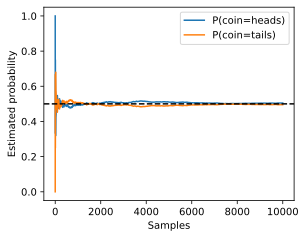

In [9]:
counts = Multinomial(1, fair_probs).sample((10000,))
print(counts, counts.size(), sep="\n")
cum_counts = counts.cumsum(dim=0)
print(cum_counts)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()
print(estimates)

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color="black", linestyle="dashed")
d2l.plt.gca().set_xlabel("Samples")
d2l.plt.gca().set_ylabel("Estimated probability")
d2l.plt.legend()